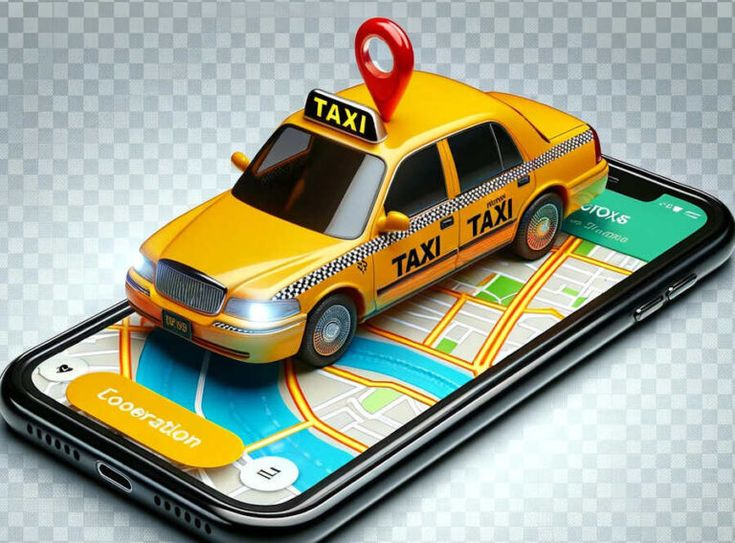
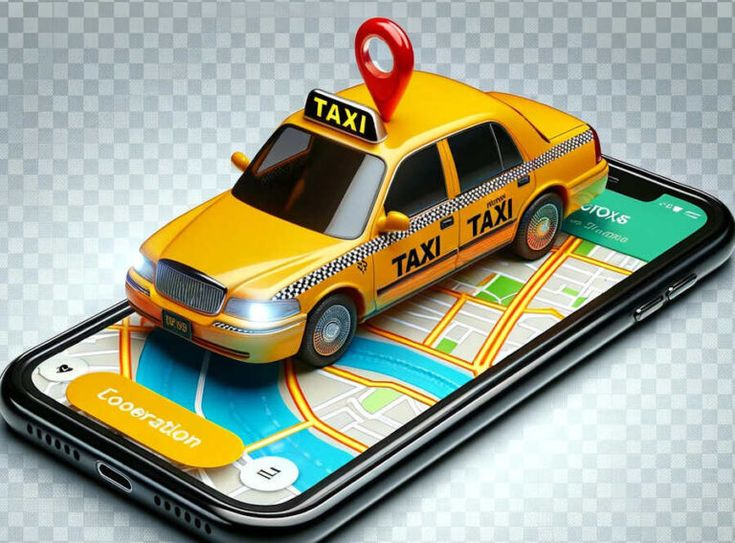



## Author: Priya Chakradhari  
## Focus: Exploratory Data Analysis & Machine Learning – Seaborn Taxi Dataset
> "This notebook explores the Seaborn Taxi dataset to understand trip patterns, fares, distances, and travel behavior, and builds a regression model to predict taxi fare based on trip and location features."
## LinkedIn: https://www.linkedin.com/in/priya-chakradhari/  
## GitHub: https://github.com/priyachakradhari  
## Twitter(X): https://x.com/PriyaChakr87701

### Metadata

| Column Name     | Description                       |
| --------------- | --------------------------------- |
| pickup          | Pickup date and time of the trip  |
| dropoff         | Dropoff date and time of the trip |
| passengers      | Number of passengers in the taxi  |
| distance        | Distance traveled during the trip |
| fare            | Base fare amount for the trip     |
| tip             | Tip amount given by the passenger |
| tolls           | Tolls charged during the trip     |
| total           | Total cost of the trip            |
| color           | Color/type of the taxi            |
| payment         | Method of payment used            |
| pickup_zone     | Zone where the trip started       |
| dropoff_zone    | Zone where the trip ended         |
| pickup_borough  | Borough where the trip started    |
| dropoff_borough | Borough where the trip ended      |


### Problem Statement:
> The objective of this project is to build a regression model that predicts taxi fare based on pickup and dropoff information, time of travel, and number of passengers. This helps estimate trip cost in advance and understand which factors influence taxi pricing.

> Goal: Predict fare using trip, time, and location features.

> Type: Supervised Regression

> Target: fare

# <h1 style= "color:#4DA3FF"> Analysis begins here.

##  1. Import Libraries 

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### - Load Dataset

In [ ]:
df = sns.load_dataset("taxis")
df.head()

#### - Shape of dataset

In [ ]:
df.shape

#### - Information of the dataset

In [ ]:
df.info()

#### - Describe Data

In [ ]:
df.describe()

#### - Duplicate dataset 

In [ ]:
df.duplicated().sum()

##  2. Handle missing values

In [ ]:
df.isnull().sum()/len(df)*100

Observation: 

> The dataset contains a small number of missing values in categorical location and payment columns (<1% of rows). Since the proportion is negligible, these rows were removed to keep the dataset clean and avoid introducing artificial categories.

In [ ]:
df = df.dropna()

Observation : 
> Some trips have a recorded distance of 0, even when passengers are present and the pickup and dropoff locations are the same. These trips do not represent actual movement and likely correspond to cancelled rides or logging errors. Therefore, they were removed to ensure the model learns meaningful patterns.

In [ ]:
df = df[df['distance']>0]

In [ ]:
df = df[df['passengers']>0]

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

Observation: 
> After removing trips with missing values, zero distance, zero passengers, and non-positive fares, the dataset contains only valid and realistic trips suitable for modeling.

## 3. EDA Analysis

In [ ]:
sns.histplot(x =df['fare'], kde = True, bins = 25)
plt.show()

In [ ]:
# checking relationship between distance vs fare

sns.scatterplot(x = df['fare'], y= df['distance'])
plt.plot()


In [ ]:
sns.barplot(x = df['passengers'], y = df['fare'])
plt.show()

In [ ]:
sns.barplot(x = df['payment'], y = df['fare'])
plt.show()

In [ ]:
sns.barplot(x = df['pickup_borough'], y = df['fare'])
plt.show()

## 4. Feature Construction

In [ ]:
df['pickup_hours'] = df['pickup'].dt.hour
df['pickup_dayofweek'] = df['pickup'].dt.dayofweek
df['pickup_month'] = df['pickup'].dt.month

In [ ]:
df = df.drop(columns = ['pickup', 'dropoff', 'total', 'tip', 'tolls', 'pickup_zone', 'dropoff_zone'])
df.head()

## 5. Feature Encoding 

In [ ]:
categorical_cols = ['color','payment', 'pickup_borough', 'dropoff_borough']
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)

In [ ]:
df.info()

## 6. Train Test Split

In [ ]:
X = df.drop('fare', axis = 1)
y = df['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

## - Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

## Evaluation Matrix

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))

## Let's Try Tree based model - RandomForest

In [ ]:
X = df.drop('fare', axis = 1)
y = df['fare']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [ ]:
numeric_cols = ['distance', 'passengers', 'pickup_hours', 'pickup_dayofweek', 'pickup_month']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,   # Number of trees
    max_depth=15,       # Limit tree depth to prevent overfitting
    random_state=42,
    n_jobs=-1           # Use all CPU cores
)

## - Result

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print("RandomForest Regression Results:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))




## Conclusion




 **Final statement (for notebook ending):**

> “This project demonstrates how careful **data cleaning, feature engineering, and model selection** can produce meaningful fare predictions. Distance dominates as the main predictor, while time and location features contribute moderately. Future improvements can focus on handling outliers and incorporating interaction features to further enhance model performance.”


